+----------------------------------------+
|          Top Artists Streamed          |
+------+--------------------+------------+
| Rank |    Artist Name     | Play Count |
+------+--------------------+------------+
|  1   |        SZA         |    2769    |
|  2   |   Kendrick Lamar   |    1401    |
|  3   |     Kali Uchis     |    1158    |
|  4   | Tyler, The Creator |    1121    |
|  5   |      Beyoncé       |    711     |
+------+--------------------+------------+
+------------------------------------------------------------------+
|                        Top Songs Streamed                        |
+------+----------------------------------------------+------------+
| Rank |                  Song Name                   | Play Count |
+------+----------------------------------------------+------------+
|  1   | Ghost in the Machine (feat. Phoebe Bridgers) |    207     |
|  2   |               I Wish you Roses               |    161     |
|  3   |                   Special          

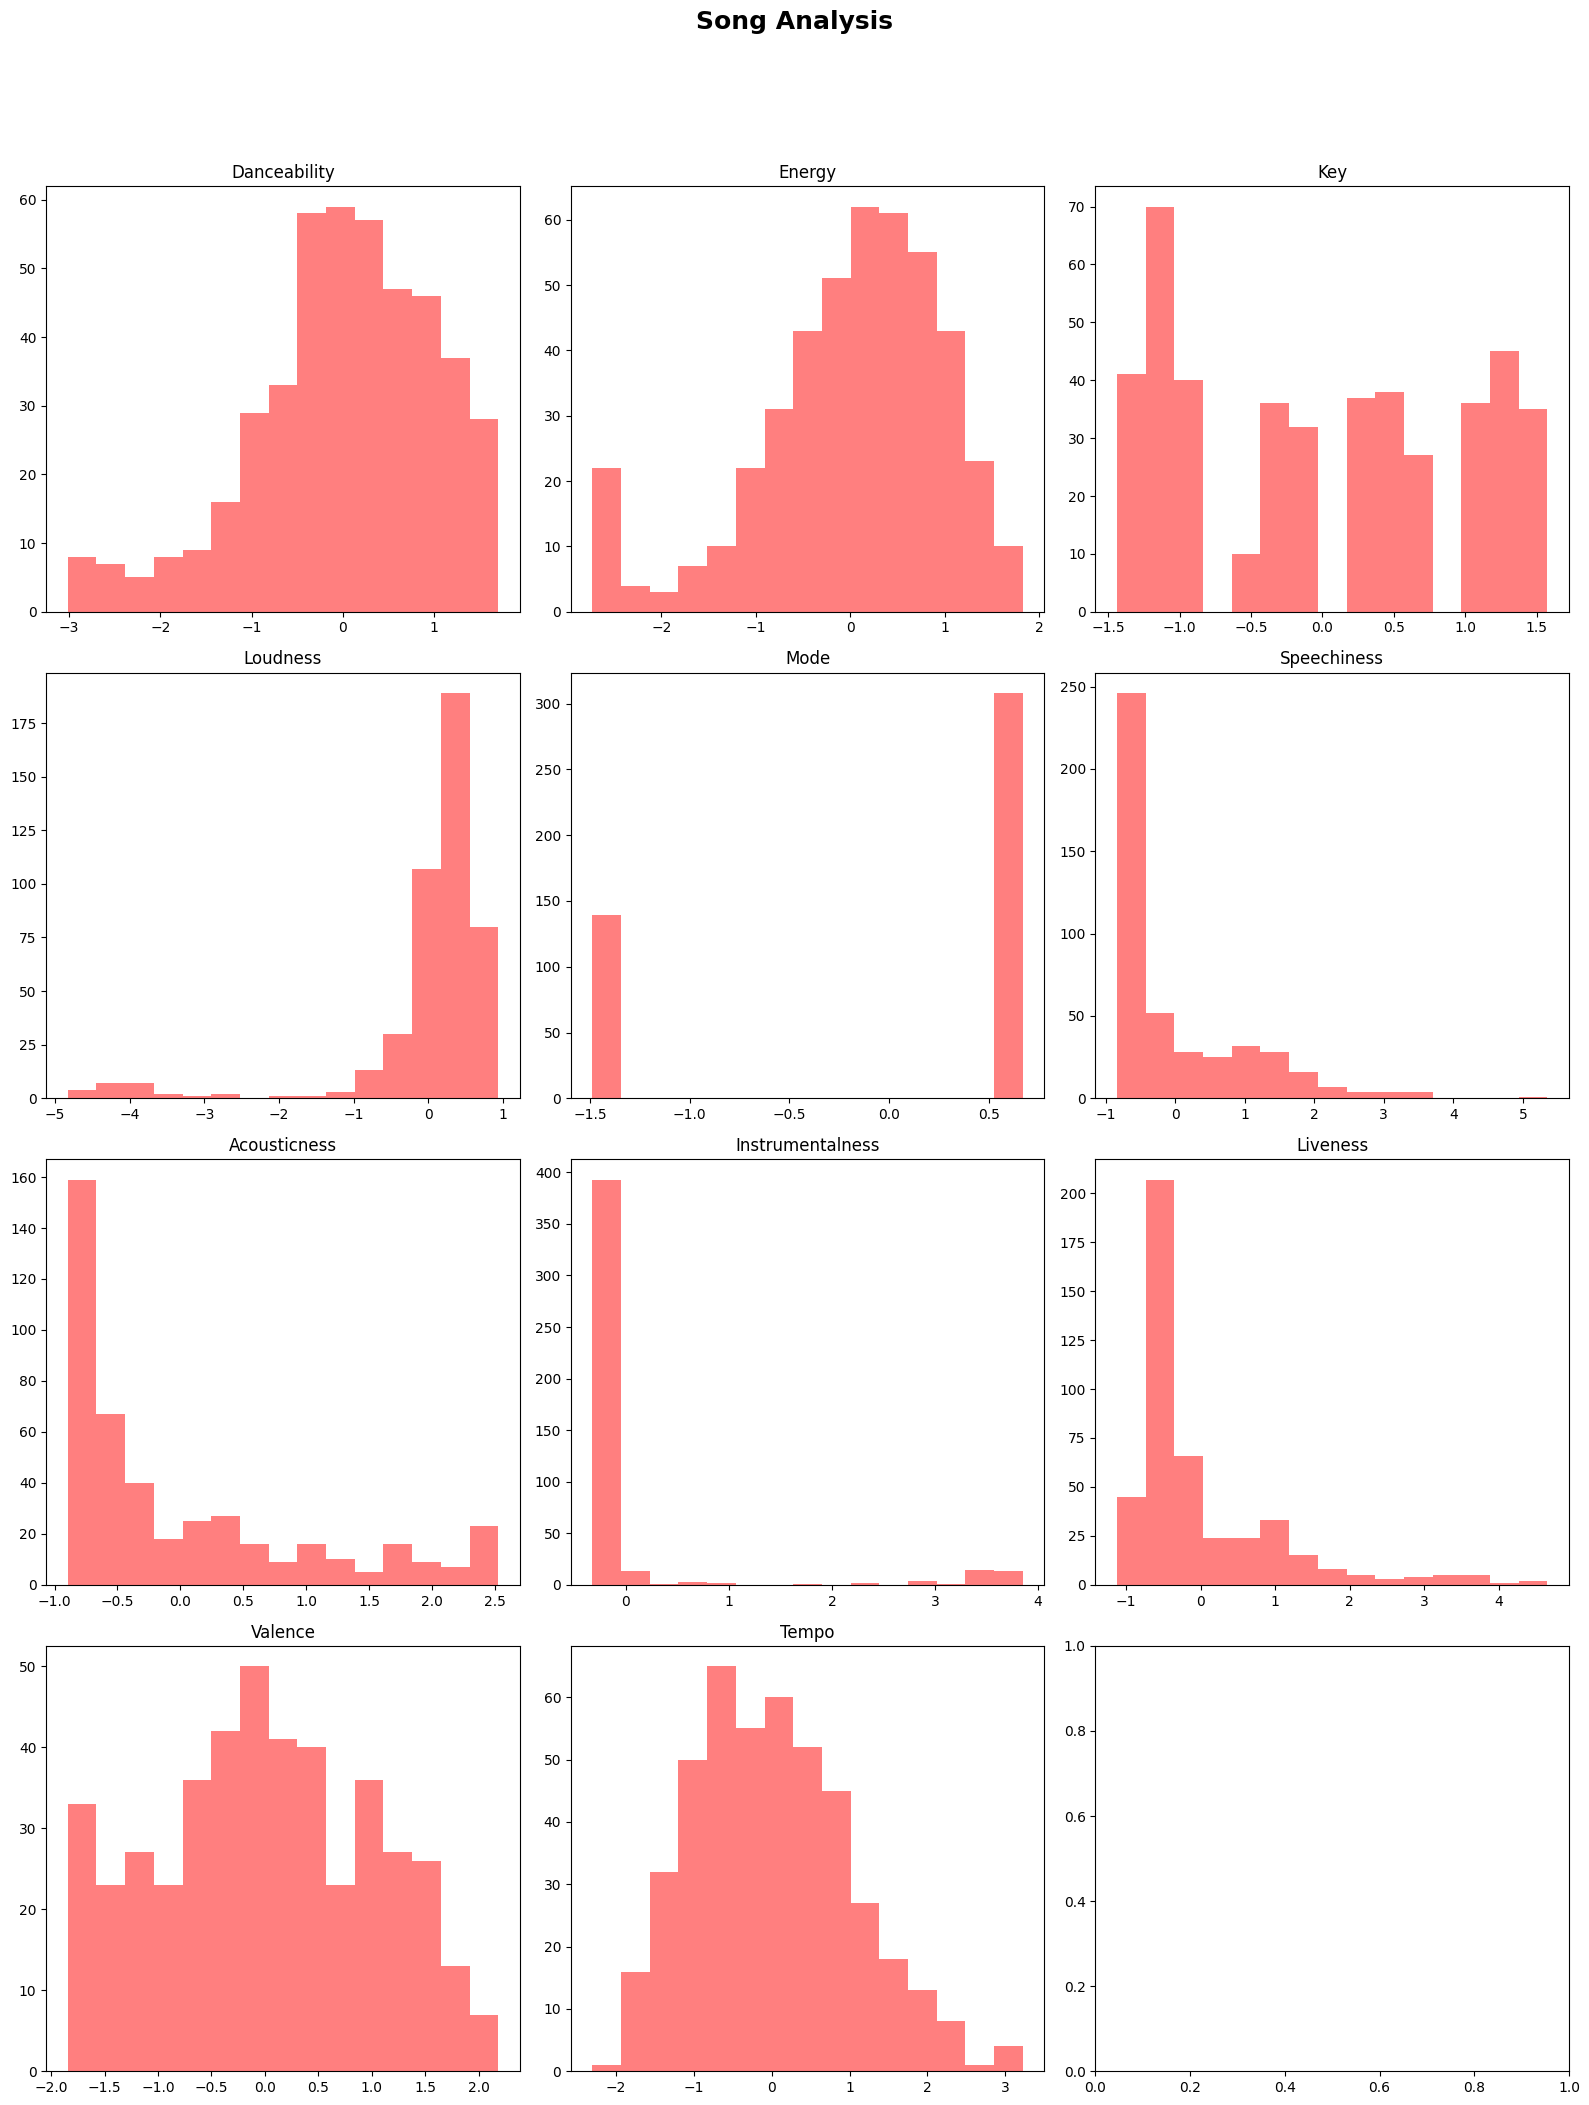

In [46]:
#This program uses your sptify streaming data, provided by spotify at the users request
#and informs you your top five artists and top 5 songs and displays them in a table

#First we import all the needed libraries for our program
import ast
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from typing import List
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler

#Next we define our class, and its init function.
class StreamingData:
    def __init__(self, path: str):
        self.path = path
        self.recent_streams = []
        self.artist_count = {}
        self.song_count = {}

    #our first method loads that streaming history data from the file that spotify gave you, and stores it in a list.
    def load_data(self) -> None:
        files = ['MyData/' + x for x in listdir(self.path) if x.split('.')[0][:-1] == 'StreamingHistory']
        for k in files:
            with open(k, 'r', encoding='UTF-8') as f:
                new_streams = ast.literal_eval(f.read())
                self.recent_streams += [m for m in new_streams]

    #This method uses the dictonary data type and encodes each artist as a key and the number of times they were streamed as the value.
    def count_artists(self) -> None:
        for play in self.recent_streams:
            artist_name = play['artistName']
            if artist_name in self.artist_count:
                self.artist_count[artist_name] += 1
            else:
                self.artist_count[artist_name] = 1
    #This method uses the dictonary data type and encodes each song as a key and the number of times they it was streamed as the value.
    def count_songs(self) -> None:
        for play in self.recent_streams:
            song_name = play['trackName']
            if song_name in self.song_count:
                self.song_count[song_name] += 1
            else:
                self.song_count[song_name] = 1

        return self.song_count
    
    #This method finds a streamers top five artists aquired from the count_artists method and returns a table.
    def get_top_artists(self, n: int = 5) -> str:
        sorted_artists = sorted(self.artist_count.items(), key=lambda x: x[1], reverse=True)
        table1 = PrettyTable()
        table1.title = 'Top Artists Streamed'
        table1.field_names = ['Rank', 'Artist Name', 'Play Count']
        for i, (artist,count) in enumerate(sorted_artists[:n]):
            table1.add_row([i+1, artist, count])
        return str(table1)
    
    #This method finds a streamers top 5 songaquired from the count_songs methos and rturns them in a table.
    def get_top_songs(self, n: int = 5) -> str:
        sorted_songs = sorted(self.song_count.items(), key= lambda x: x[1], reverse = True )
        table = PrettyTable()
        table.title = 'Top Songs Streamed'
        table.field_names = ['Rank', 'Song Name', 'Play Count']
        for i, (song, count) in enumerate(sorted_songs[:n]):
            table.add_row([i+1, song, count])
        return str(table)
    
#This is a subclass of the prior class, and allows you to visualize the average audio features of the songs you stream.
#In order to create the csv file, you have to request access from spotify, which is done in a seperate part of the porject.

class SongInsights(StreamingData):
    def __init__(self, path: str, csv_file: str):
        #first we aquire from the parent class
        super().__init__(path)
        #Next we read the csv file using the pandas library
        self.csv_file = csv_file
        self.data = pd.read_csv(csv_file)
    
    #This method visulaizes the audio features of your streaming history using histograms.  
    def plot_insights(self):
        df = self.data
        #These are the variables spotify uses to analyze every song
        variables = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo']
        scaler = StandardScaler()
        #we then transform the data from the csv file using sklearn library and create subplots for eacch varible using matplotlib.
        df[variables] = scaler.fit_transform(df[variables])
        fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))
        #create a title for all the sub plots to go under
        fig.suptitle('Song Analysis', fontsize=18, fontweight='bold', y=1.05)

        fig.subplots_adjust(top=0.80)
        #make it easy to read the subpllots by putting them in rows and collumns
        # Plot the first three rows with three plots per row
        for i, variable in enumerate(variables[:9]):
            row = i // 3
            col = i % 3
            axes[row, col].hist(df[variable], bins=15, color='r', alpha=0.5)
            axes[row, col].set_title(str(variable).title())

        # Plot the last two rows with two plots per row
        for i, variable in enumerate(variables[9:]):
            row = i // 2 + 3
            col = i % 2
            axes[row, col].hist(df[variable], bins=15, color='r', alpha=0.5)
            axes[row, col].set_title(str(variable).title())
        #returning the sublots for all the variables
        plt.tight_layout()
        plt.show()

        
streaming_data = StreamingData('MyData')
streaming_data.load_data()
streaming_data.count_artists()
streaming_data.count_songs()

count_artist = streaming_data.get_top_artists()
count_song = streaming_data.get_top_songs()
print(count_artist)
print(count_song)

haley_insights = SongInsights('MyData','streaming_history999.csv')
haley_insights.plot_insights()


In [11]:
import requests
from urllib.parse import urlencode
import base64
import webbrowser
#This code requests spotify for their song analysis by getting autorization from a single user.
#The articles and code I used for this were written by the authors: Sean Dutton-Jones and Vlad Gheorghe
#proper cittation of these authors and their articles is in the final report.

#Use app credentials to get accesess to api
client_id = "4497a049e1b84c2a9ff43a577f11bb75"
client_secret = "1d8dd62f0e794b09899a346bd12507ad"

auth_headers = {
    "client_id": client_id,
    "response_type": "code",
    "redirect_uri": "http://localhost:7777/callback",
    "scope": "user-library-read"
}
#get doce from redirect uri
webbrowser.open("https://accounts.spotify.com/authorize?" + urlencode(auth_headers))
#after varrifying your spotify account, record code from borwser
code = "AQBlNuReU50MgApNb_yPqz9AZ-SRCOHc0t0JPa0Uo23yJvDjx1nJAZHHR_rBkNxgl4LAj_JUnmJD5AXHJmvjz6yX9XURFwsq58fZo-7uBkG-dTti3jzxM30T08dY-B0vZCm0oh5I5dj2LPY2yV2w_HWyhhfnJiAV14XafdaHRCrFyx-TL3uwON9-2SS1xncn-ESeYdA"


encoded_credentials = base64.b64encode(client_id.encode() + b':' + client_secret.encode()).decode("utf-8")

#after verrifying yourself to spotify, retrive token that allows you to access data for every song 
token_headers = {
    "Authorization": "Basic " + encoded_credentials,
    "Content-Type": "application/x-www-form-urlencoded"
}

token_data = {
    "grant_type": "authorization_code",
    "code": code,
    "redirect_uri": "http://localhost:7777/callback"
}

r = requests.post("https://accounts.spotify.com/api/token", data=token_data, headers=token_headers)

#print token needed for access to API
token = r.json()["access_token"]
print(token)

True

In [14]:
import spotipy
import requests
#This block of code is how to create a csv file from your sptify streaming history

#first you get the ID for each song
def get_id(track_name: str, token: str, artist: str = None) -> str:
    headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
    params = [
    ('q', track_name),
    ('type', 'track'),
    ]
    if artist:
        params.append(('artist', artist))
    try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers=headers, params=params)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
    except:
        return None
    
#and then you get the audio features from each song
def get_features(track_id: str, token: str) -> dict:
    sp = spotipy.Spotify(auth=token)
    try:
        response = requests.get(f'https://api.spotify.com/v1/audio-features/{track_id}',
                                headers={'Authorization': f'Bearer {token}'})
        if response.status_code == 200:
            features = sp.audio_features([track_id])
            return features[0]
        else:
            print('Request failed with status code:', response.status_code)
            return None
    except requests.exceptions.Timeout:
        print('Request timed out.')
        return None
    except:
        print('Request failed.')
        return None
    
streamings = streaming_data()
#create a list that has every single tracj in it
unique_tracks = list(set([streaming['trackName'] for streaming in streamings]))

all_features = {}
#create a dictionary to encode each feature for each tracl
for track in enumerate(unique_tracks):
    track_id = get_id(track, token)
    features = get_features(track_id, token)
    if features:
        all_features[track] = features
#create a list that you can later turn into a csvfile
with_features = []
#append tracks name and features to the list
for track_name, features in all_features.items():
    with_features.append({'name': track_name, **features})


#convert that file into a csv file
import pandas as pd
df = pd.DataFrame(with_features)
df.to_csv('streaming_history999.csv')

5RxpYHVbGJPOvSEATQyg9P
